<a href="https://colab.research.google.com/github/ankitha-dudla/EDA-GLOBAL-TERRORISM/blob/main/ANKITHA_EDA_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


**IMPORTING ALL THE NECESSARY LIBRARIES AND THE DATA**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import math 
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go



Now lets fetch the data ..


working without data is like eating cake without bread..

In [ ]:
#Importing the dataset
df = pd.read_csv("/content/drive/MyDrive/Global Terrorism Data  modified (1).csv",encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**DATA UNDERSTANDING**

**BASIC CHECKS**

In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
list(df.columns)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

let us see the shape of the data set sothat we can get the idea of how many features and rows we have

In [ ]:
df.shape

(181691, 135)

so we have 181691 rows and 135 columns

It's seems to be alot ...and I believe we need to remove all the unnecessary data

In [ ]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002704e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325955e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991020e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009020e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014080e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017120e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


**LET'S NOW FIND OUT THE PERCENTAGE OF MISSING VALUES COLUMN WISE **

In [ ]:
#getting the percentage of each  null values column wise
missingvalues_percentage = df.isna().sum().sort_values(ascending=False)/len(df)
missingvalues_percentage

gsubname3           0.999890
weapsubtype4_txt    0.999615
weapsubtype4        0.999615
weaptype4           0.999598
weaptype4_txt       0.999598
                      ...   
suicide             0.000000
success             0.000000
crit3               0.000000
property            0.000000
eventid             0.000000
Length: 135, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

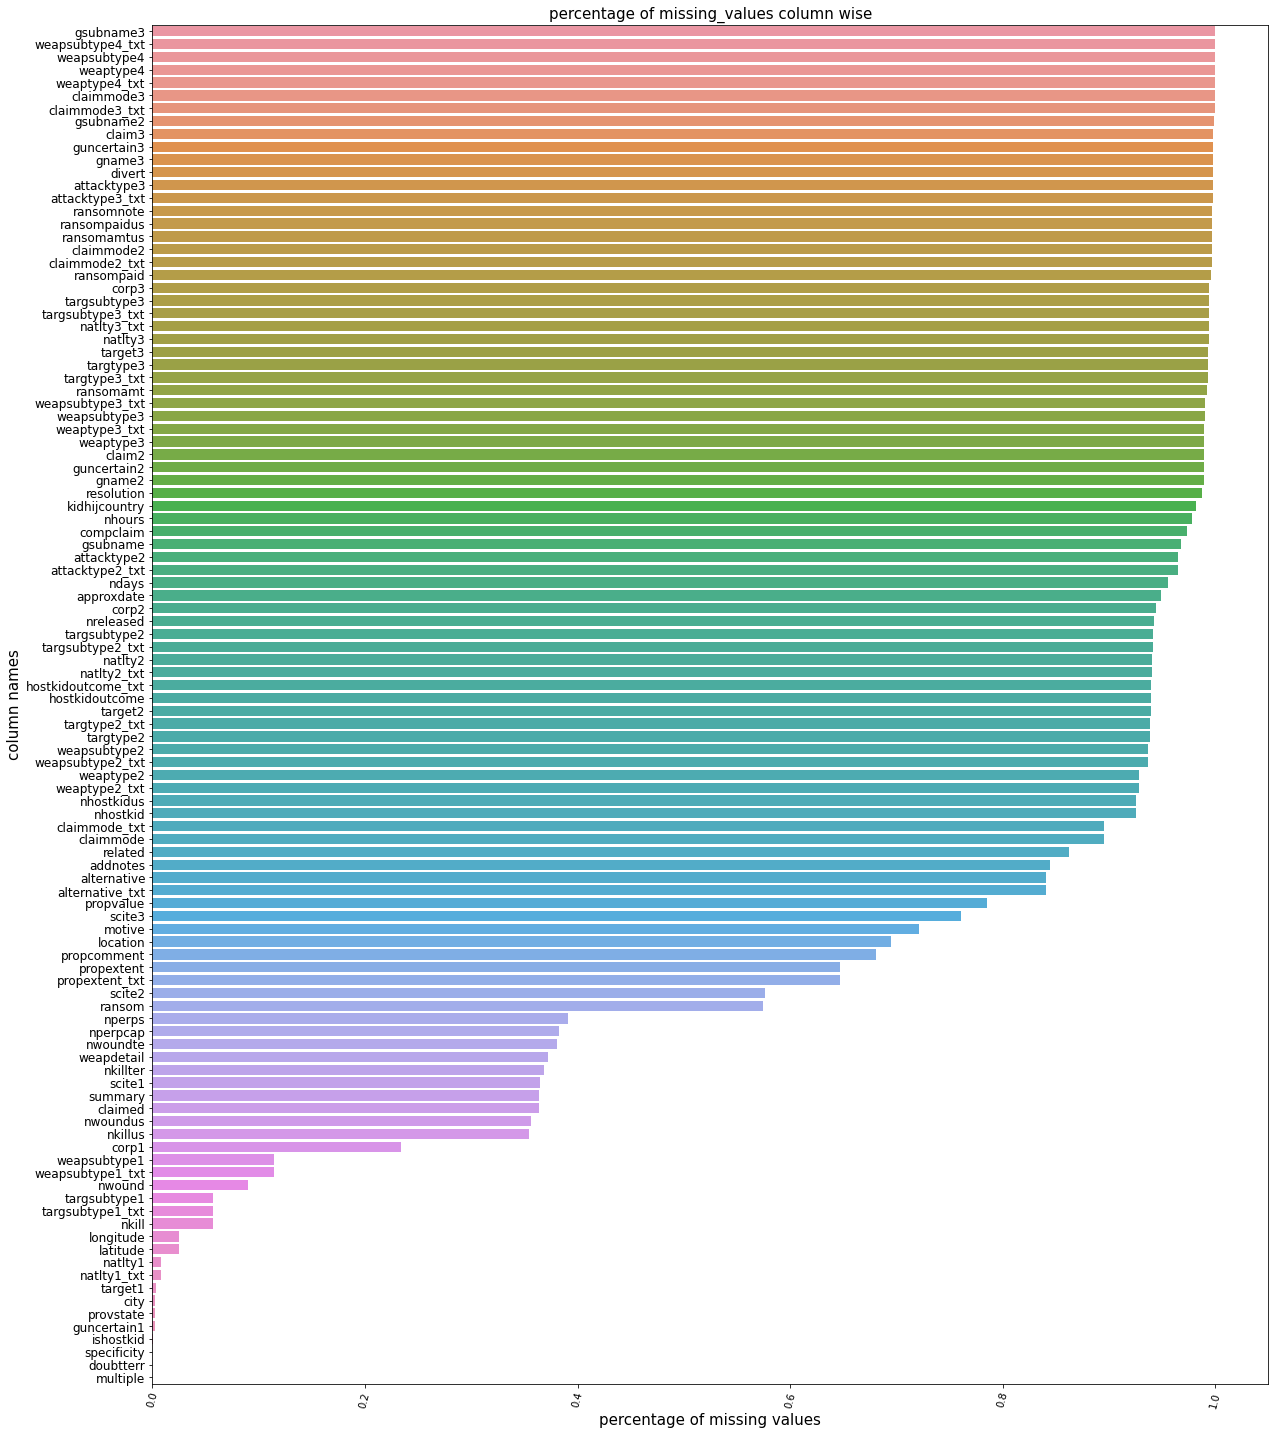

In [ ]:
#plotting the graph for missing values colummn wise
plt.figure(figsize=(20,25))
plt.xticks(rotation=75)
plt.yticks(fontsize=12)
plt.title('percentage of missing_values column wise',fontsize=15)


a=sns.barplot(x=missingvalues_percentage[missingvalues_percentage>0.0],y=missingvalues_percentage[missingvalues_percentage>0.0].index)
a.set_ylabel('column names',fontsize=15)
a.set_xlabel('percentage of missing values',fontsize=15)
plt.show

# DATA CLEANING





In [ ]:
# now lets find out the columns which have the more than 15% missing values
droping_columns_list = list(missingvalues_percentage[missingvalues_percentage>0.15].index.values) 


In [ ]:

df.columns



Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
df.shape

(181691, 135)

In [ ]:
#exploring the remaining column data for missing values
missingvalues_percentage = df.isna().sum().sort_values(ascending= False)/len(df) #To get the percentage of null values each column wise
missingvalues_percentage

gsubname3           0.999890
weapsubtype4_txt    0.999615
weapsubtype4        0.999615
weaptype4           0.999598
weaptype4_txt       0.999598
                      ...   
suicide             0.000000
success             0.000000
crit3               0.000000
property            0.000000
eventid             0.000000
Length: 135, dtype: float64

Now lets plot the graph for remaining missing values 


<Figure size 720x576 with 0 Axes>

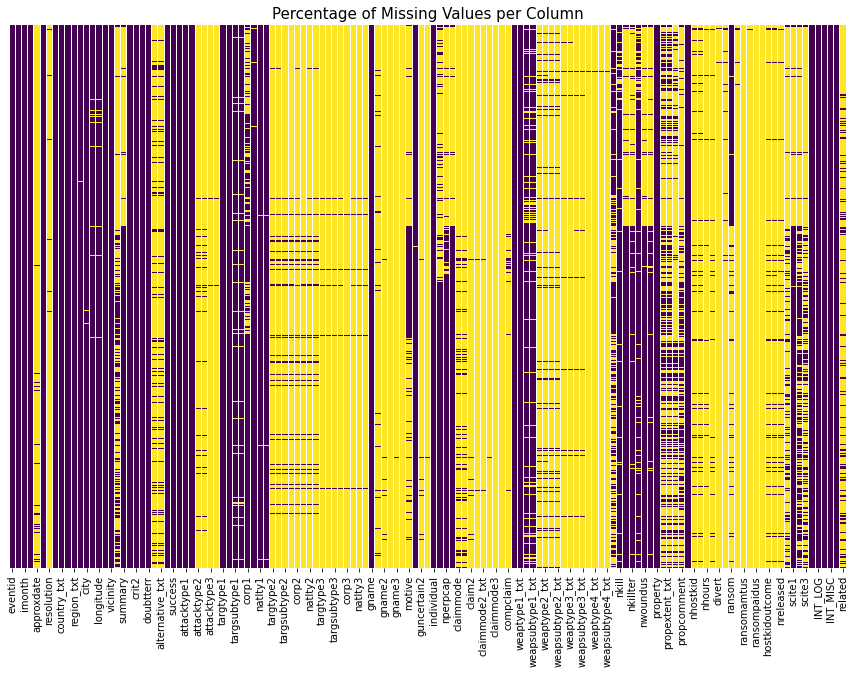

In [ ]:
# plt.figure(figsize=(30,20))
# plt.xticks(rotation=75)
# plt.yticks(fontsize=15)
# plt.title("Percentage of Missing Values per Column",fontsize=15)

# a=sns.barplot(x=missingvalues_percentage,y=missingvalues_percentage.index)
# a.set_ylabel("Columns Names",fontsize= 15)
# a.set_xlabel("Percentage missing values",fontsize= 15)
# plt.show()

plt.figure(figsize=(10,8))
plt.figure(figsize=(15,10))
plt.title("Percentage of Missing Values per Column",fontsize=15)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


Now for our analysis, lets anlyze the the following columns from th dataset :

1. Year, Month, Country, Region, State, City,
2. ishostkid, Successs, Nationality of victim
3. Attack type, Target type, Weapon type,
4. nkills, nwound, Gang name





In [ ]:
df.drop(columns={'eventid','extended','iday','country','targsubtype1','region','weaptype1','weapsubtype1','specificity','vicinity','crit1','crit2','crit3','doubtterr','multiple','suicide',
                  'attacktype1','targtype1','targsubtype1_txt','target1','natlty1_txt','guncertain1','individual','weapsubtype1_txt','property','dbsource','INT_LOG','INT_IDEO','INT_MISC','INT_ANY'
                  },inplace=True,axis=1)

In [ ]:
df.shape

(181691, 105)

after dropping the columns now we have 17 columns

In [ ]:
df.head()

,iyear,imonth,approxdate,resolution,country_txt,region_txt,provstate,city,latitude,longitude,...,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,related
0,1970,7,NaN,NaN,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970,0,NaN,NaN,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970,1,NaN,NaN,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1970,1,NaN,NaN,Greece,Western Europe,Attica,Athens,37.997490,23.762728,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1970,1,NaN,NaN,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.tail()

,iyear,imonth,approxdate,resolution,country_txt,region_txt,provstate,city,latitude,longitude,...,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,related
181686,2017,12,NaN,NaN,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,...,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",NaN
181687,2017,12,NaN,NaN,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,...,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",NaN
181688,2017,12,NaN,NaN,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,...,NaN,NaN,NaN,NaN,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,NaN
181689,2017,12,NaN,NaN,India,South Asia,Manipur,Imphal,24.798346,93.940430,...,NaN,NaN,NaN,NaN,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,NaN
181690,2017,12,NaN,NaN,Philippines,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,...,NaN,NaN,NaN,NaN,NaN,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,NaN


In [ ]:
df.describe()

,iyear,imonth,latitude,longitude,alternative,success,attacktype2,attacktype3,natlty1,targtype2,...,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased
count,181691.000000,181691.000000,177135.000000,1.771340e+05,29011.000000,181691.000000,6314.000000,428.000000,180132.000000,11144.000000,...,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000
mean,2002.638997,6.467277,23.498343,-4.586957e+02,1.292923,0.889598,3.719512,5.245327,127.686441,10.247218,...,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269
std,13.259430,3.388303,18.569242,2.047790e+05,0.703729,0.313391,2.272023,2.246642,89.299120,5.709076,...,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119
min,1970.000000,0.000000,-53.154613,-8.618590e+07,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,...,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000
25%,1991.000000,4.000000,11.510046,4.545640e+00,1.000000,1.000000,2.000000,2.000000,83.000000,4.000000,...,0.000000,-99.000000,-99.000000,0.000000,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000
50%,2009.000000,6.000000,31.467463,4.324651e+01,1.000000,1.000000,2.000000,7.000000,101.000000,14.000000,...,0.000000,-99.000000,-99.000000,0.000000,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000
75%,2014.000000,9.000000,34.685087,6.871033e+01,1.000000,1.000000,7.000000,7.000000,173.000000,14.000000,...,0.000000,0.000000,4.000000,0.000000,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000
max,2017.000000,12.000000,74.633553,1.793667e+02,5.000000,1.000000,9.000000,8.000000,1004.000000,22.000000,...,86.000000,999.000000,2454.000000,1.000000,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000


In [ ]:
df.info

<bound method DataFrame.info of         iyear  imonth approxdate resolution         country_txt  \
0        1970       7        NaN        NaN  Dominican Republic   
1        1970       0        NaN        NaN              Mexico   
2        1970       1        NaN        NaN         Philippines   
3        1970       1        NaN        NaN              Greece   
4        1970       1        NaN        NaN               Japan   
...       ...     ...        ...        ...                 ...   
181686   2017      12        NaN        NaN             Somalia   
181687   2017      12        NaN        NaN               Syria   
181688   2017      12        NaN        NaN         Philippines   
181689   2017      12        NaN        NaN               India   
181690   2017      12        NaN        NaN         Philippines   

                         region_txt        provstate           city  \
0       Central America & Caribbean              NaN  Santo Domingo   
1                    

In [ ]:
df.columns

Index(['iyear', 'imonth', 'approxdate', 'resolution', 'country_txt',
       'region_txt', 'provstate', 'city', 'latitude', 'longitude',
       ...
       'ransompaidus', 'ransomnote', 'hostkidoutcome', 'hostkidoutcome_txt',
       'nreleased', 'addnotes', 'scite1', 'scite2', 'scite3', 'related'],
      dtype='object', length=105)

**DATA MANIPULATION**

In [ ]:
df=df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','success':'Success','attacktype1_txt':'Attack_type','targtype1_txt':'Target_type','targsubtype1_txt':'Target_subtype','gname':'Gang_name','weaptype1_txt':'Weapon_Type','nkill':'Kills','nwound':'Wounds'})


In [ ]:
df.columns

Index(['Year', 'Month', 'approxdate', 'resolution', 'Country', 'Region',
       'State', 'City', 'latitude', 'longitude',
       ...
       'ransompaidus', 'ransomnote', 'hostkidoutcome', 'hostkidoutcome_txt',
       'nreleased', 'addnotes', 'scite1', 'scite2', 'scite3', 'related'],
      dtype='object', length=105)

In [ ]:
df['State']= df['State'].fillna('Unkown')
df['City']=df['City'].fillna('Unkown')
df['Target_type']= df['Target_type'].fillna("Others")
df['Kills']=df['Kills'].fillna(0)
df['Wounds']=df['Wounds'].fillna(0)
df['victims']=df['Kills']+df['Wounds']

In [ ]:
#finding unique values
df[['Country','Region','Target_type','Attack_type','Gang_name','Weapon_Type']].nunique()

Country         205
Region           12
Target_type      22
Attack_type       9
Gang_name      3537
Weapon_Type      12
dtype: int64

In [ ]:
df.head()

,Year,Month,approxdate,resolution,Country,Region,State,City,latitude,longitude,...,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,related,victims
0,1970,7,NaN,NaN,Dominican Republic,Central America & Caribbean,Unkown,Santo Domingo,18.456792,-69.951164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1970,0,NaN,NaN,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,1970,1,NaN,NaN,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,1970,1,NaN,NaN,Greece,Western Europe,Attica,Athens,37.997490,23.762728,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,1970,1,NaN,NaN,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
df.shape

(181691, 106)

In [ ]:
df.describe()

,Year,Month,latitude,longitude,alternative,Success,attacktype2,attacktype3,natlty1,targtype2,...,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,victims
count,181691.000000,181691.000000,177135.000000,1.771340e+05,29011.000000,181691.000000,6314.000000,428.000000,180132.000000,11144.000000,...,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000
mean,2002.638997,6.467277,23.498343,-4.586957e+02,1.292923,0.889598,3.719512,5.245327,127.686441,10.247218,...,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,5.150156
std,13.259430,3.388303,18.569242,2.047790e+05,0.703729,0.313391,2.272023,2.246642,89.299120,5.709076,...,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,40.555416
min,1970.000000,0.000000,-53.154613,-8.618590e+07,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,...,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,0.000000
25%,1991.000000,4.000000,11.510046,4.545640e+00,1.000000,1.000000,2.000000,2.000000,83.000000,4.000000,...,-99.000000,-99.000000,0.000000,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,0.000000
50%,2009.000000,6.000000,31.467463,4.324651e+01,1.000000,1.000000,2.000000,7.000000,101.000000,14.000000,...,-99.000000,-99.000000,0.000000,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,1.000000
75%,2014.000000,9.000000,34.685087,6.871033e+01,1.000000,1.000000,7.000000,7.000000,173.000000,14.000000,...,0.000000,4.000000,0.000000,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,4.000000
max,2017.000000,12.000000,74.633553,1.793667e+02,5.000000,1.000000,9.000000,8.000000,1004.000000,22.000000,...,999.000000,2454.000000,1.000000,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,9574.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 106 entries, Year to victims
dtypes: float64(50), int64(3), object(53)
memory usage: 146.9+ MB


# I. UNIVARIATE ANALYSIS



# 1.ANALYSIS OF GLOBAL TERROR ATTACKS

**1.1 ANALYSIS OF TERROR ATTACKS YEAR WISE**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


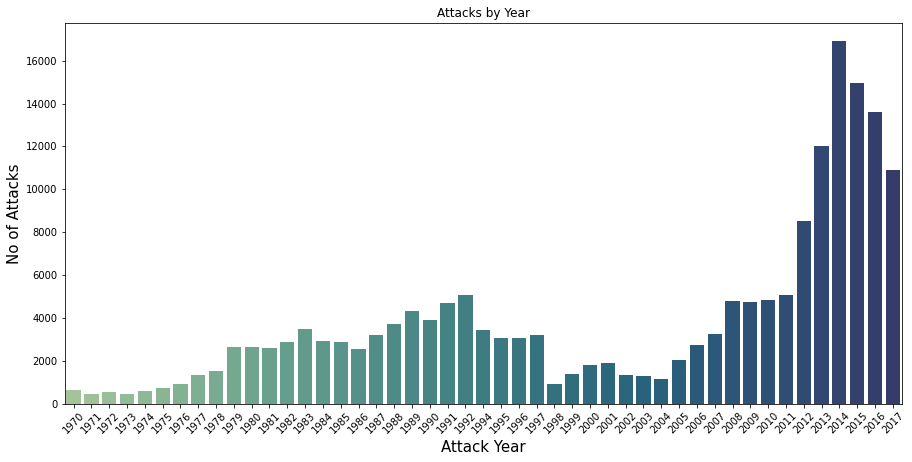

In [ ]:
# No of Attacks Vs Year - Analysis graph
plt.figure(figsize=(15,7));
ax= df['Year'].unique()
ay = df['Year'].value_counts(dropna=False).sort_index()
sns.barplot(ax,ay,palette= 'crest')
plt.xticks(rotation=45)
plt.ylabel('No of Attacks',fontsize= 15)
plt.xlabel("Attack Year",fontsize= 15)
plt.title("Attacks by Year")
plt.show()

**SUMMARY** 
from the above graph we can clearly observe that 

1. from the year 2004 we can see that no.of attacks are increasing.
2. the last three years terror attacks were decreasing.

**1.2. Analysis of Terror attacks in the Year 2014**

In [ ]:
# Selecting the year 2014 from Global terrorism data set for brief study
df_2014 = df[df.Year==2014]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([   0., 2000., 4000., 6000., 8000.]),
 <a list of 5 Text major ticklabel objects>)

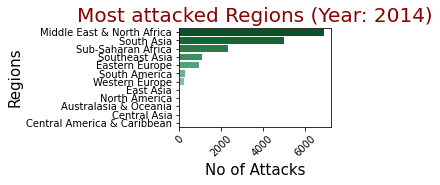

In [ ]:
# Regions that were attacked most (Year: 2014)
plt.subplot(2,2,1)
sns.barplot(df_2014['Region'].value_counts().values,df_2014['Region'].value_counts().index,palette='BuGn_r')
plt.title("Most attacked Regions (Year: 2014)",fontsize=20,color='darkred')
plt.ylabel('Regions',fontsize=15)
plt.xlabel('No of Attacks',fontsize=15)
plt.xticks(rotation=45)


**OBSERVATIONS**:
1. Middle East and North Africa were attacked most in 2014.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]), <a list of 10 Text major ticklabel objects>)

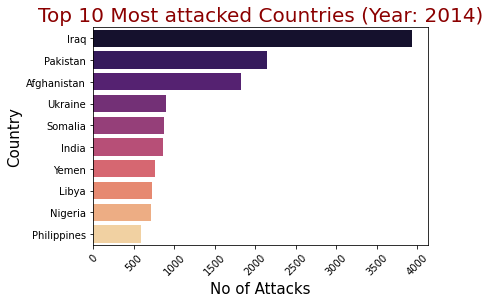

In [ ]:
# Top 10 countries that were attacked (Year: 2014)
plt.subplot(1,1,1)
sns.barplot(df_2014['Country'].value_counts().head(10).values,df_2014['Country'].value_counts().head(10).index,palette='magma')
plt.title("Top 10 Most attacked Countries (Year: 2014)",fontsize=20,color='darkred')
plt.ylabel('Country',fontsize=15)
plt.xlabel('No of Attacks',fontsize=15)
plt.xticks(rotation=45)

**OBSERVATIONS** 
from top 10 countries 
1. Iraq was attacked mostly and was at first position .
2. philippines was attacked least and was at the tenth position.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'No of Attacks')

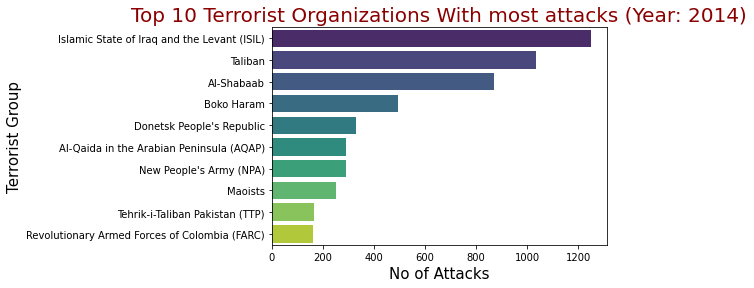

In [ ]:
# Top 10 Terrorist Gangs involved in Terror attacks (Year: 2014)
plt.subplot(1,1,1)
sns.barplot(df_2014['Gang_name'].value_counts()[1:11].values,df_2014['Gang_name'].value_counts()[1:11].index, palette='viridis')
plt.title("Top 10 Terrorist Organizations With most attacks (Year: 2014)",fontsize=20,color='darkred')
plt.ylabel('Terrorist Group',fontsize= 15)
plt.xlabel("No of Attacks",fontsize= 15)


ISIL  is the top terrorist organisation

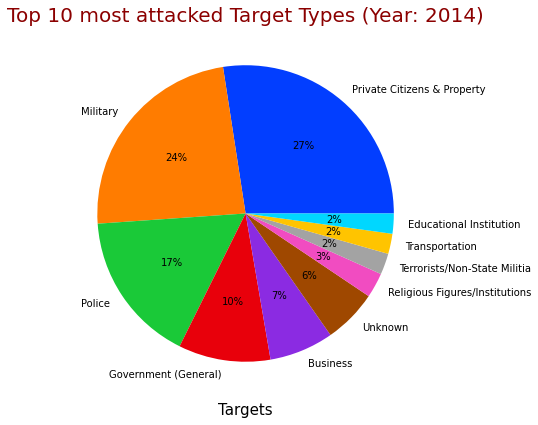

In [ ]:
# Top 10 most attacked Target types (Year: 2014)
plt.subplot(2,2,4)
palette_color = sns.color_palette('bright')
xlabels = df_2014['Target_type'].value_counts().head(10).index
ylabels= df_2014['Target_type'].value_counts().head(10).values 
plt.pie(ylabels,labels=xlabels,colors=palette_color, autopct='%.0f%%')
plt.title("Top 10 most attacked Target Types (Year: 2014)",fontsize=20,color='Darkred')
plt.xlabel("Targets",fontsize=15)

plt.gcf().set_size_inches(20,15)

**OBSERVATIONS:**

we can observe that private citizens & property are targetted first and  the second target is military .

In [ ]:
df_till_2014 = df[df.Year <= 2014]
df_after_2014 = df[df.Year > 2014]

In [ ]:
df_after_2014["Gang_name"].value_counts().sort_values(ascending = False)[1:11]

Islamic State of Iraq and the Levant (ISIL)    3990
Taliban                                        3208
Al-Shabaab                                     1531
Boko Haram                                     1113
Houthi extremists (Ansar Allah)                 892
Kurdistan Workers' Party (PKK)                  855
New People's Army (NPA)                         852
Maoists                                         747
Sinai Province of the Islamic State             426
Palestinian Extremists                          370
Name: Gang_name, dtype: int64

Text(0.5, 0, 'No of Attacks')

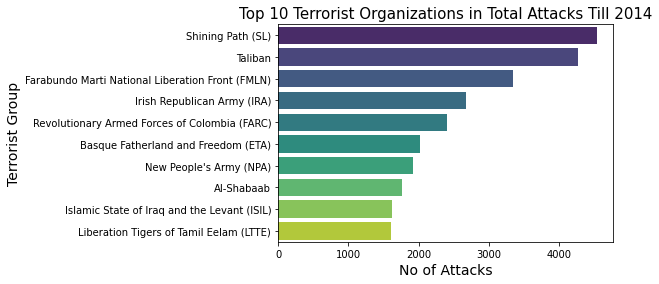

In [ ]:
# Top 10 Terrorist Organizations in total attacks till 2014

plt.subplot(1,1,1)

sns.barplot(x = df_till_2014["Gang_name"].value_counts().sort_values(ascending = False)[1:11] , y = df_till_2014["Gang_name"].value_counts().sort_values(ascending = False)[1:11].index, palette='viridis')
plt.title("Top 10 Terrorist Organizations in Total Attacks Till 2014",fontsize = 15)
plt.ylabel('Terrorist Group',fontsize= 14)
plt.xlabel("No of Attacks",fontsize= 14)

"SL" is the top terrorist organisation till 2014

Text(0.5, 0, 'Targets')

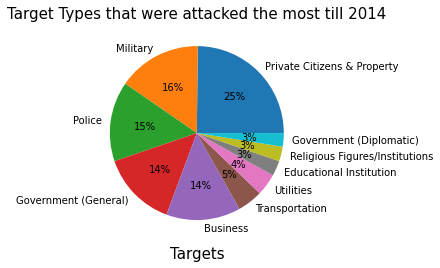

In [ ]:
# Target Types that were attacked the most till 2014

plt.subplot(1,1,1)
plt.pie(df_till_2014['Target_type'].value_counts().head(10).values , labels=df_till_2014['Target_type'].value_counts().head(10).index , autopct='%.0f%%')
plt.title("Target Types that were attacked the most till 2014",fontsize = 15)
plt.xlabel("Targets",fontsize = 15)

Private citizens&property,military,police were the top three places that were attacked till 2014.

Text(0.5, 0, 'No of Attacks')

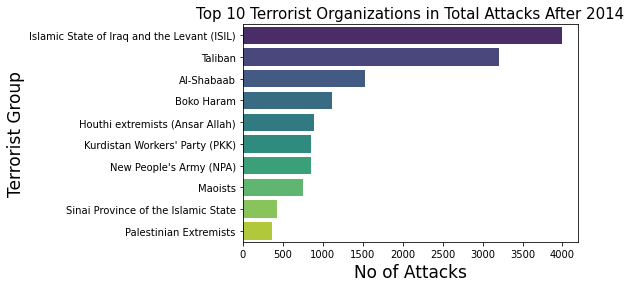

In [ ]:
# Top 10 Terrorist Organizations in total attacks after 2014
plt.subplot(1,1,1)
sns.barplot(x = df_after_2014["Gang_name"].value_counts().sort_values(ascending = False)[1:11] , y = df_after_2014["Gang_name"].value_counts().sort_values(ascending = False)[1:11].index, palette='viridis')
plt.title("Top 10 Terrorist Organizations in Total Attacks After 2014",fontsize = 15)
plt.ylabel('Terrorist Group',fontsize= 17)
plt.xlabel("No of Attacks",fontsize= 17)

"ISIL" is the top terrorist organizations in attacks after 2014.

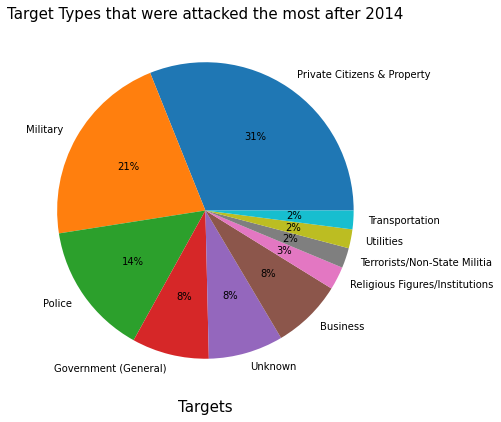

In [ ]:
# Target Types that were attacked the most after 2014
plt.subplot(2,2,4)
plt.pie(df_after_2014['Target_type'].value_counts().head(10).values , labels=df_after_2014['Target_type'].value_counts().head(10).index , autopct='%.0f%%')
plt.title("Target Types that were attacked the most after 2014",fontsize = 15)
plt.xlabel("Targets",fontsize=15)


plt.gcf().set_size_inches(20,15)

Private Citizens & property,Military,Police were the top three places that were attacked by terrorists after 2014.

**1.3 Analysis of Most Target types World wide**

In [ ]:
# Total Attack types in the Terror attacks world wide
df['Attack_type'].value_counts().sort_values(ascending=False)

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack_type, dtype: int64

In [ ]:
# Percentage of Attack type in overall Attacks
round((df['Attack_type'].value_counts()/df.shape[0])*100,2)

Bombing/Explosion                      48.57
Armed Assault                          23.48
Assassination                          10.63
Hostage Taking (Kidnapping)             6.14
Facility/Infrastructure Attack          5.70
Unknown                                 4.00
Unarmed Assault                         0.56
Hostage Taking (Barricade Incident)     0.55
Hijacking                               0.36
Name: Attack_type, dtype: float64

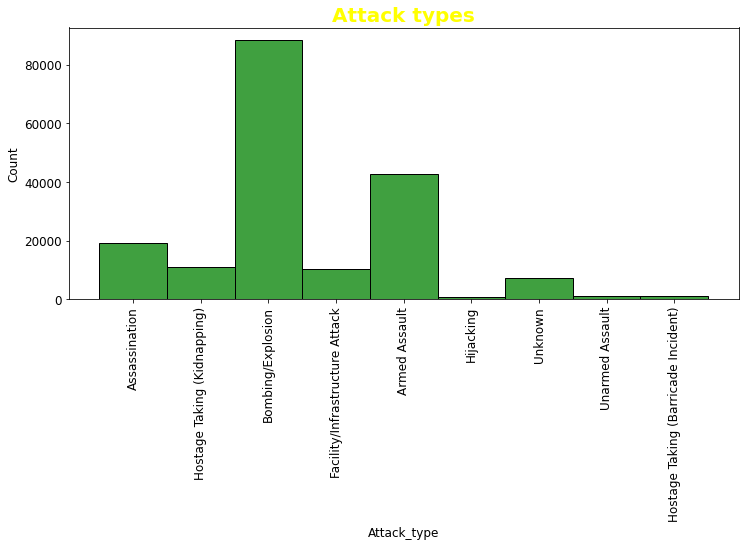

In [ ]:
# Plotting Top 10 Attack Type Vs No of Attacks world wide
plt.figure(figsize=(12,5));
plt.rcParams.update({'font.size':12});
plt.xticks(rotation = 90)
plt.title('Attack types',fontsize=20,color='yellow',fontweight="bold")
sns.histplot(df['Attack_type'],palette='rocket',color='green')

Most attack type is Bombing/Explosion.

In [ ]:
df['Target_type'].value_counts().sort_values(ascending= False)

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target_type, dtype: int64

In [ ]:
# Percentage of Target type in overall targets
(df['Target_type'].value_counts().head(10)/df.shape[0])*100

Private Citizens & Property       23.947801
Military                          15.401974
Police                            13.487735
Government (General)              11.713844
Business                          11.375907
Transportation                     3.742068
Utilities                          3.314969
Unknown                            3.246171
Religious Figures/Institutions     2.443709
Educational Institution            2.378764
Name: Target_type, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


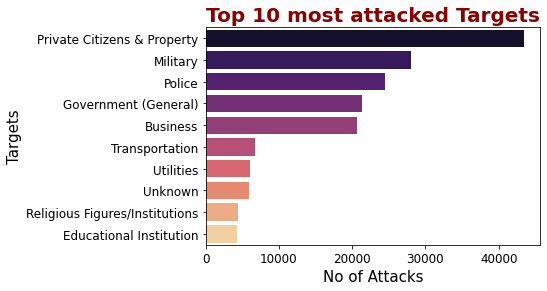

In [ ]:
# Plotting Top 10 Target Type Vs No of Attacks world wide
sns.barplot(df['Target_type'].value_counts().head(10).values,df['Target_type'].value_counts().head(10).index,palette ='magma')
plt.title("Top 10 most attacked Targets",fontsize=20,color='darkred',fontweight="bold")
plt.ylabel("Targets",fontsize=15)
plt.xlabel("No of Attacks",fontsize=15)
plt.show()

PrivateCitizens& property ,military,policy were the main targets for terror attacks.

**1.5 Analysis of Most used Weapon types in Terror attacks world wide**

In [ ]:
# Total Weapon types used in the Terror attacks world wide
df['Weapon_Type'].value_counts().sort_values(ascending=False)

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

In [ ]:
# Percentage of Weapon type used in overall Attacks
round((df['Weapon_Type'].value_counts()/df.shape[0])*100,2)[:6]

Explosives    50.87
Firearms      32.21
Unknown        8.34
Incendiary     6.13
Melee          2.01
Chemical       0.18
Name: Weapon_Type, dtype: float64

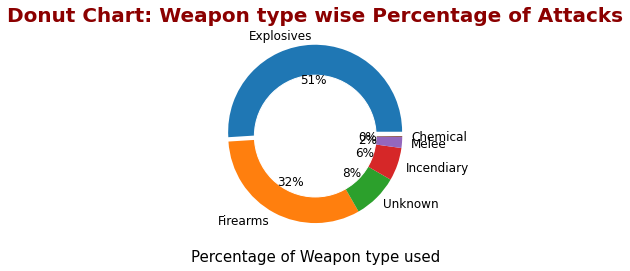

In [ ]:
# Donut chart indicating the percentage of Weapon types used for attacks
explode = (0.05,0,0,0,0,0)
plt.pie(round((df['Weapon_Type'].value_counts()/df.shape[0])*100,2)[:6],explode=explode,labels=round((df['Weapon_Type'].value_counts()/df.shape[0])*100,2)[:6].index,
        autopct='%.0f%%')
my_circle = plt.Circle((0,0),0.7,color='white')
plt.title("Donut Chart: Weapon type wise Percentage of Attacks",color="Darkred",fontsize=20,fontweight="bold")
plt.xlabel("Percentage of Weapon type used",fontsize=15)
p=plt.gcf().gca().add_artist(my_circle)
plt.rcParams['figure.figsize'] = (20,15)
plt.show()


"EXPLOSIVES" were used mostly as a weapon for terror attacks 

1.6 **Analysis of Success /Failure of terror attacks**

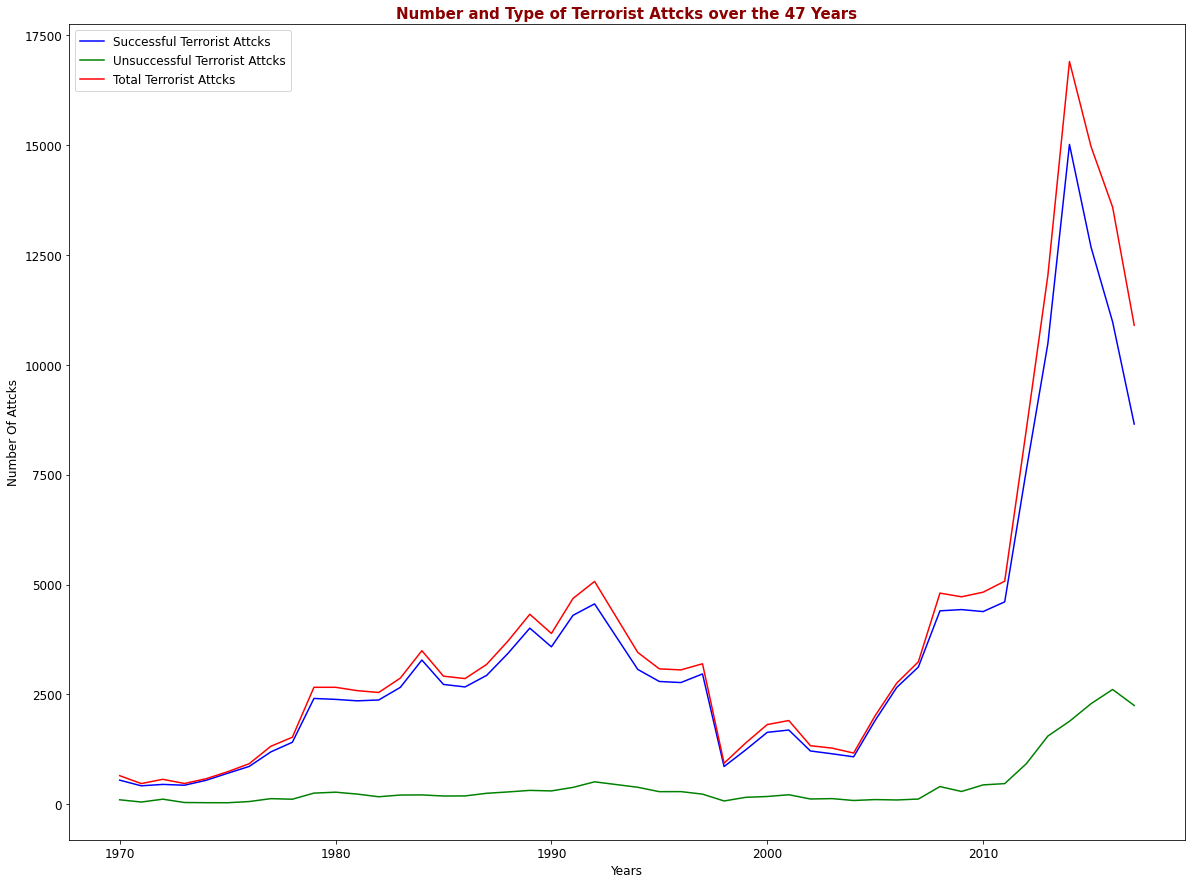

In [ ]:
plt.subplot(1,1,1)

plt.plot(df[df["Success"].isin([1])].groupby(["Year"])["Success"].count() , label = "Successful Terrorist Attcks" , color = "blue")
plt.plot(df[df["Success"].isin([0])].groupby(["Year"])["Success"].count() , label = "Unsuccessful Terrorist Attcks" , color = "green")
plt.plot(df["Year"].value_counts(dropna=False).sort_index() , label = "Total Terrorist Attcks" , color = "red")

plt.xlabel("Years")
plt.ylabel("Number Of Attcks")
plt.title("Number and Type of Terrorist Attcks over the 47 Years" , fontsize = 15, fontweight ="bold",color='Darkred')
plt.legend()


Text(0.5, 1.0, 'Success Percentage From all incidents from 1970 to 2017')

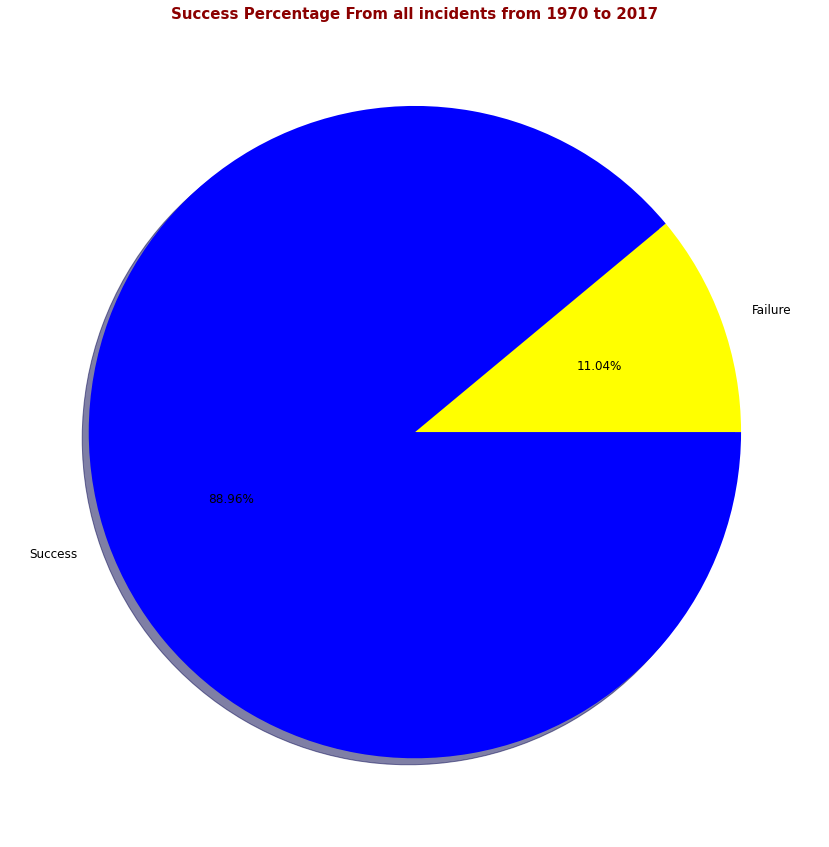

In [ ]:
plt.subplot(1,1,1)

plt.pie(df.groupby(["Success"])["Success"].count() , labels = ["Failure" , "Success"] , autopct='%1.2f%%', colors=['yellow','blue'],shadow=True)
plt.title("Success Percentage From all incidents from 1970 to 2017" , fontsize = 15, fontweight ="bold",color='Darkred')


we can observe that success rate is 88.96% and failure rate is 11.04%.

Text(0.5, 1.0, 'Success Percentage From all incidents from 1970 to 2014')

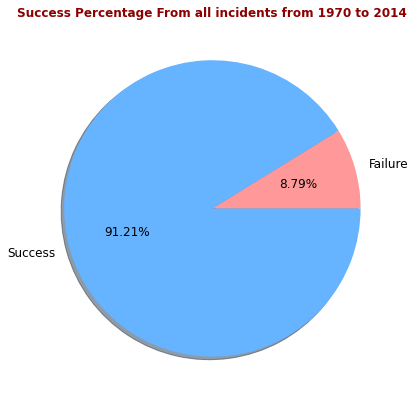

In [ ]:
plt.subplot(2,2,3)


plt.pie(df[df["Year"] < 2014].groupby(["Success"])["Success"].count() , labels = ["Failure" , "Success"] , autopct='%1.2f%%',colors=['#ff9999','#66b3ff'],shadow=True)#['grey','pink'])
plt.title("Success Percentage From all incidents from 1970 to 2014" , fontsize = 12, fontweight ='bold',color='Darkred')

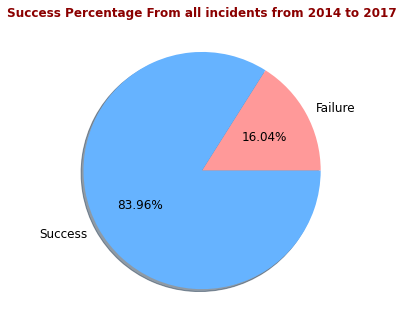

In [ ]:
plt.subplot(2,2,4)

plt.pie(df[df["Year"] >= 2014].groupby(["Success"])["Success"].count() , labels = ["Failure" , "Success"] , autopct='%1.2f%%',colors=['#ff9999','#66b3ff'],shadow=True)


plt.title("Success Percentage From all incidents from 2014 to 2017" , fontsize = 12, fontweight ="bold",color='Darkred')

plt.gcf().set_size_inches(20,12)

# **2. Region wise Terror attacks Analysis**

**2.1. Analysis of Year Vs No of Attacks Regional wise**

In [ ]:
reg = pd.crosstab(df.Year, df.Region)
reg

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317
1975,0,9,0,12,0,44,159,55,4,7,12,438
1976,0,45,0,2,0,55,125,91,4,12,11,578
1977,0,24,0,4,2,211,149,119,2,8,29,771
1978,2,199,0,35,2,128,117,222,2,44,46,729


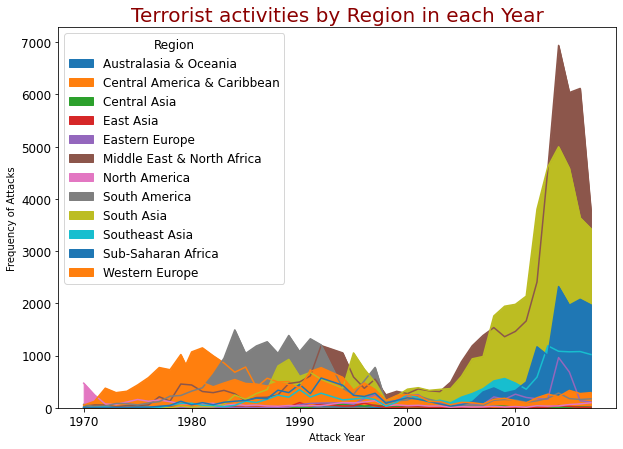

In [ ]:
# Area plot representing the Year Vs no of Attacks Regional wise
reg.plot(kind='area',stacked=False,alpha=1,figsize=(10,7))
plt.ylabel('Frequency of Attacks',fontsize= 10)
plt.xlabel("Attack Year",fontsize= 10)
plt.title("Terrorist activities by Region in each Year",fontsize=20,color='Darkred')
plt.show()

MiddleEast & North Africa is the most terrorist activity region in the world .

**2.2. Analysis of Year Vs Frequency of Attacks Regional wise**

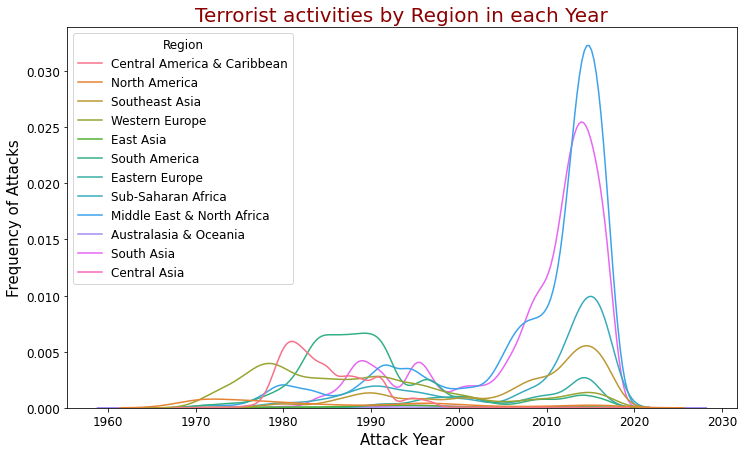

In [ ]:
# Line plot representing the Year Vs Frequency of Attacks Regional wise
plt.figure(figsize=(12,7))
sns.kdeplot(df['Year'],hue= df['Region'])
plt.ylabel('Frequency of Attacks',fontsize= 15)
plt.xlabel("Attack Year",fontsize= 15)
plt.title("Terrorist activities by Region in each Year",fontsize=20,color='Darkred')
plt.show()

'**Middle East & North Africa'** is the region with most frequent terror attacks in the world followed by '**South Asia'.**

**2.3. Analysis of Terror attacks in 'Middle East & North Africa' region**

In [ ]:
df_ME = df[df.Region=='Middle East & North Africa']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'No of Attacks')

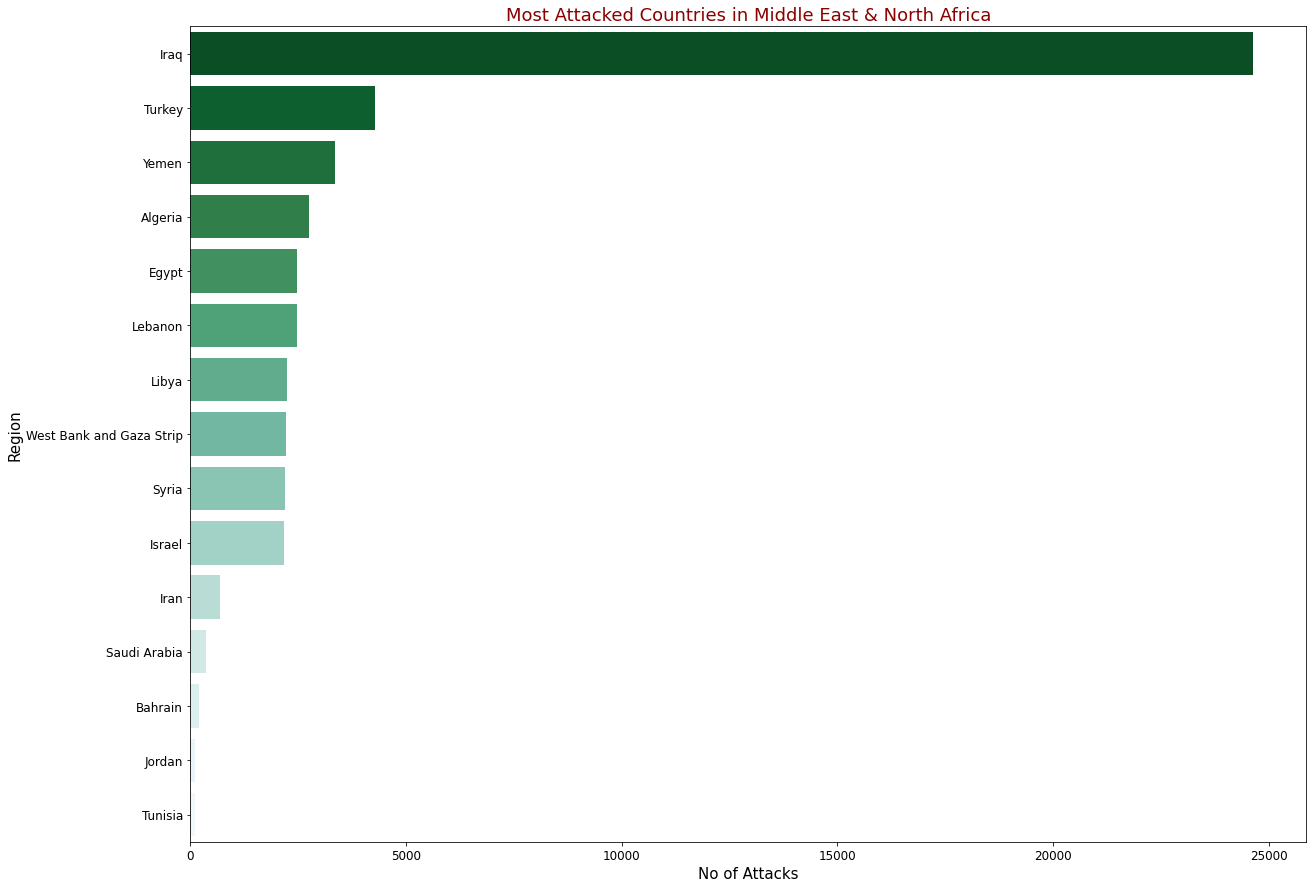

In [ ]:
# Top 15 Countries in Middle East & North Africa which were attacked most by Terrorists
plt.subplot(1,1,1)
sns.barplot(df_ME['Country'].value_counts().head(15).values,df_ME['Country'].value_counts().head(15).index, palette='BuGn_r')
plt.title("Most Attacked Countries in Middle East & North Africa",fontsize= 18,color='Darkred')
plt.ylabel('Region',fontsize=15)
plt.xlabel('No of Attacks',fontsize = 15)

**OBSERVATIONS :**

1.'IRAQ' is the  most attacked country and "TUNISIA "is the least attacked country in Middle East & North Africa.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


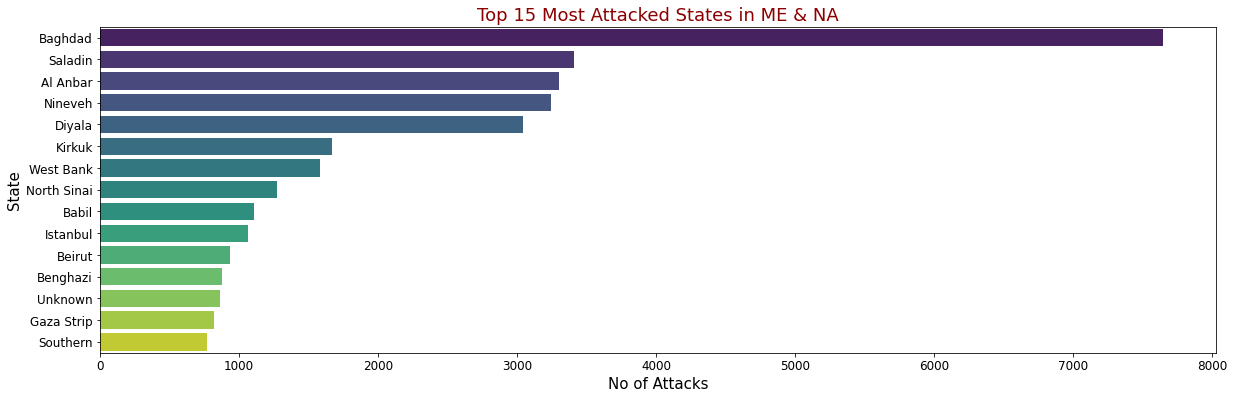

In [ ]:
# Top 15 States which were attacked in Middle East & North Africa region by Terrorists
plt.subplot(1,1,1)
sns.barplot(df_ME['State'].value_counts().head(15).values,df_ME['State'].value_counts().head(15).index, palette='viridis')
plt.title("Top 15 Most Attacked States in ME & NA",fontsize= 18,color='Darkred')
plt.ylabel('State',fontsize=15)
plt.xlabel('No of Attacks',fontsize = 15)
plt.gcf().set_size_inches(20,6)

'BAGHDAD'is the most and 'SOUTHERN' isthe least attacked states in ME & NE

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


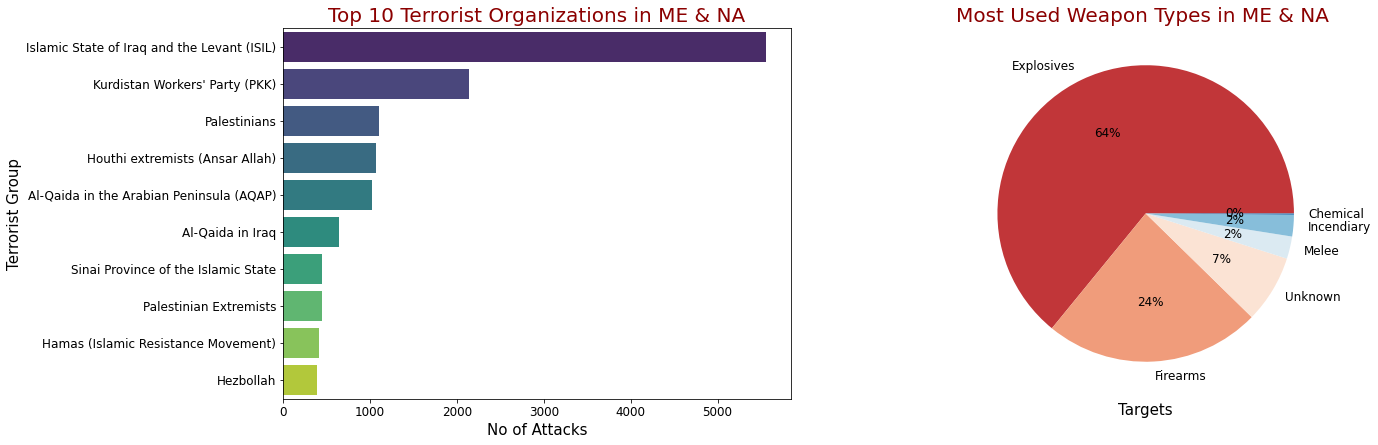

In [ ]:
# Top 10 Terrorist Gangs involved Terror attacks in Middle East & North Africa (ME & NA)
plt.subplot(2,2,3)
sns.barplot(df_ME['Gang_name'].value_counts()[1:11].values,df_ME['Gang_name'].value_counts()[1:11].index, palette='viridis')
plt.title("Top 10 Terrorist Organizations in ME & NA",fontsize=20,color='darkred')
plt.ylabel('Terrorist Group',fontsize= 15)
plt.xlabel("No of Attacks",fontsize= 15)

# Most used Weapon types for attacks in Middle East & North Africa (ME & NA)
plt.subplot(2,2,4)
palette_color = sns.color_palette('RdBu')
xlabels = df_ME['Weapon_Type'].value_counts().head(6).index
ylabels= df_ME['Weapon_Type'].value_counts().head(6).values 
plt.pie(ylabels,labels=xlabels, autopct='%.0f%%',colors=palette_color)
plt.title("Most Used Weapon Types in ME & NA ",fontsize=20,color='Darkred')
plt.xlabel("Targets",fontsize=15)

plt.gcf().set_size_inches(20,15)

**OBSERVATIONS  :**

1.'ISIL' is the top terrorist organization in ME & NA.
2.'Explosives' were the top used for attacks in ME & NA. 

#          3.COUNTRYWISE  TERROR ATTACK ANALYSIS

  **3.1. Country Vs No of Terror attacks analysis**

In [ ]:
# Top 10 countreies with Most terror Attacks in the World 
df['Country'].value_counts().head(10)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


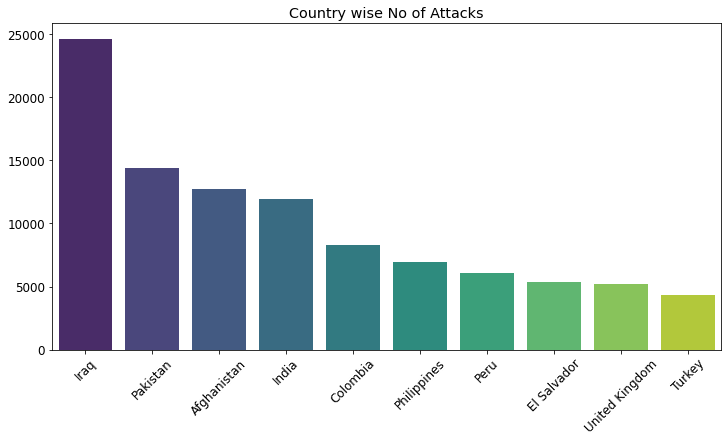

In [ ]:
# Figure representing Country Vs No of Attacks 
plt.figure(figsize=(12,6));
plt.rcParams.update({'font.size':12})
plt.xticks(rotation=45)
plt.title("Country wise No of Attacks")
sns.barplot(df['Country'].value_counts()[:10].index,df['Country'].value_counts()[:10].values,palette='viridis')

**OBSERVATIONS:**

IRAQ is the most terror attack country.

# 3.2. Analysis of Terrorist attacks in India

**3.2.1 Analysis of Year wise Terror attacks in India**

In [ ]:
df_india = df[df.Country=='India']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


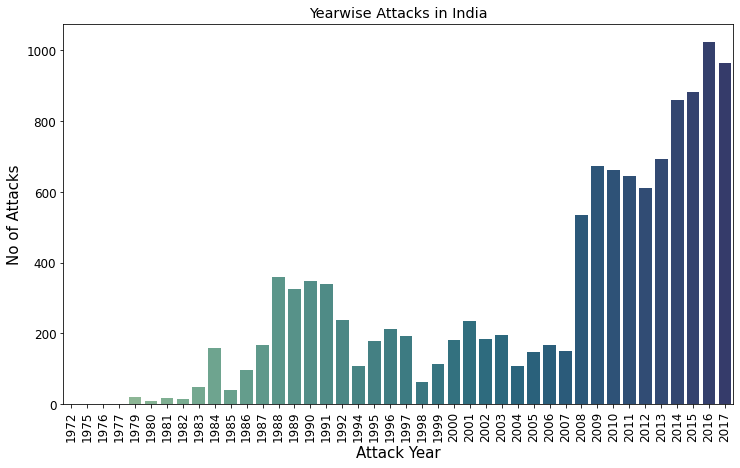

In [ ]:
ax= df_india['Year'].unique()
ay =df_india['Year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(12,7))
sns.barplot(ax,ay,palette= 'crest')
plt.xticks(rotation=90)
plt.ylabel('No of Attacks',fontsize= 15)
plt.xlabel("Attack Year",fontsize= 15)
plt.title("Yearwise Attacks in India")
plt.show()

**OBSERVATIONS**

2016 is the most terrorist attacked year in India.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


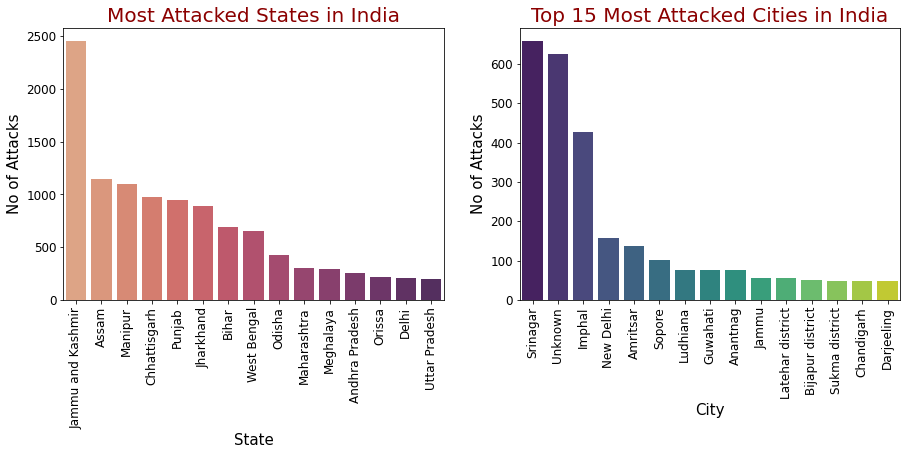

In [ ]:
# Top 10 states in India which were attacked by Terrorists:
plt.subplot(1,2,1)
sns.barplot(df_india['State'].value_counts().head(15).index,df_india['State'].value_counts().head(15).values, palette='flare')
plt.title("Most Attacked States in India",fontsize= 20,color='Darkred')
plt.xlabel('State',fontsize=15)
plt.ylabel('No of Attacks',fontsize = 15)
plt.xticks(rotation=90)

# Top 15 Cities in India which were attacked by Terrorists:
plt.subplot(1,2,2)
sns.barplot(df_india['City'].value_counts().head(15).index,df_india['City'].value_counts().head(15).values, palette='viridis')
plt.title("Top 15 Most Attacked Cities in India",fontsize= 20,color='Darkred')
plt.xlabel('City',fontsize=15)
plt.ylabel('No of Attacks',fontsize = 15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15,5)

**OBSERVATIONS :**

1.'Jammu and Kashmir' is the most attacked state in India.
2. 'srinagar' is the most attacked city inIndia.

**3.2.2 Analysis of Terrorist Attacked locations in India - State wise**

In [ ]:
# Plotting Latitude & Longitude of location in India
fig = px.scatter_geo(df_india,lat='latitude',lon='longitude',hover_name="City",color='State',projection='natural earth')
fig.update_layout(title='Terrorist Attacked Regions in India (1970-2017)',title_x=0.5)
fig.update_geos(fitbounds="locations",visible=False)
fig.update_layout(height=400, margin={"r":0,"t":35,"l":0,"b":0})
fig.show()

**3.2.3 Analysis of Terrorist attacks in India in the Year 2016**

In [ ]:
df_ind_2016 = df[(df.Country=='India') & (df.Year==2016)]

In [ ]:
# Most attacked Terrorist Groups in India after dropping 'Unkowns'
df_ind_2016['Gang_name'].value_counts()[1:11]

Maoists                                                         266
Communist Party of India - Maoist (CPI-Maoist)                   95
United Liberation Front of Assam (ULFA)                          24
Lashkar-e-Taiba (LeT)                                            16
National Socialist Council of Nagaland-Isak-Muivah (NSCN-IM)     16
Hizbul Mujahideen (HM)                                           16
Garo National Liberation Army                                    15
People's Liberation Front of India                               12
Separatists                                                      10
National Socialist Council of Nagaland-Khaplang (NSCN-K)          7
Name: Gang_name, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



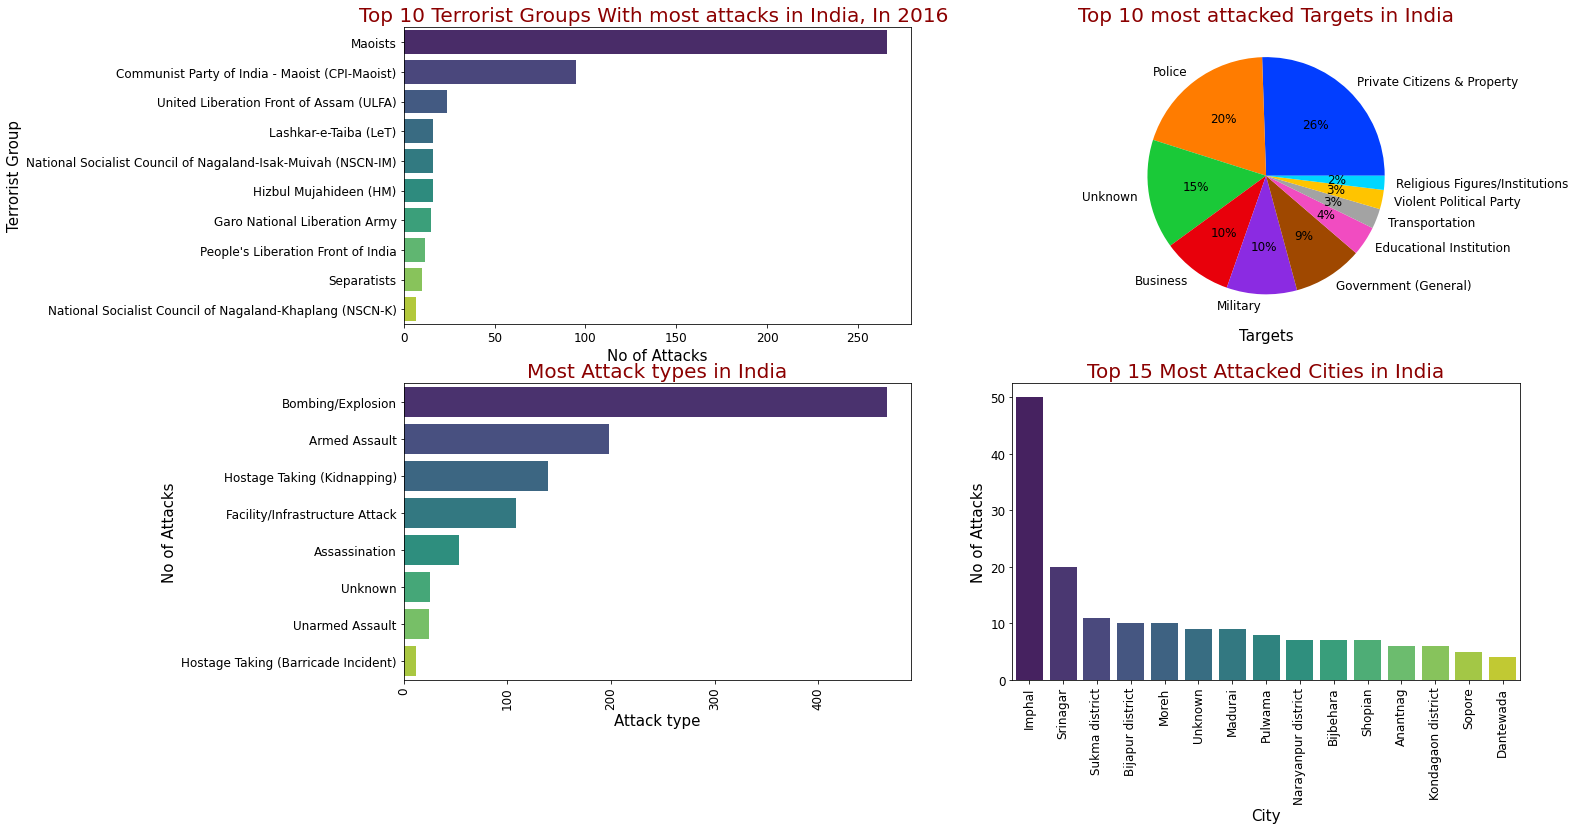

In [ ]:
plt.subplot(2,2,1)
sns.barplot(df_ind_2016['Gang_name'].value_counts()[1:11].values,df_ind_2016['Gang_name'].value_counts()[1:11].index, palette='viridis')
plt.title("Top 10 Terrorist Groups With most attacks in India, In 2016 ",fontsize=20,color='Darkred')
plt.ylabel('Terrorist Group',fontsize= 15)
plt.xlabel("No of Attacks",fontsize= 15)

plt.subplot(2,2,2)
palette_color = sns.color_palette('bright')
xlabels = df_ind_2016['Target_type'].value_counts().head(10).index
ylabels= df_ind_2016['Target_type'].value_counts().head(10).values 
plt.pie(ylabels,labels=xlabels,colors=palette_color, autopct='%.0f%%')
plt.title("Top 10 most attacked Targets in India",fontsize=20,color='Darkred')
plt.xlabel("Targets",fontsize=15)


plt.subplot(2,2,3)
sns.barplot(df_ind_2016['Attack_type'].value_counts().values,df_ind_2016['Attack_type'].value_counts().index,palette ='viridis')
plt.title("Most Attack types in India",fontsize=20,color='Darkred')
plt.xlabel("Attack type",fontsize=15)
plt.ylabel("No of Attacks",fontsize=15)
plt.xticks(rotation=90)

plt.subplot(2,2,4)
sns.barplot(df_ind_2016['City'].value_counts().head(15).index,df_ind_2016['City'].value_counts().head(15).values, palette='viridis')
plt.title("Top 15 Most Attacked Cities in India",fontsize= 20,color='Darkred')
plt.xlabel('City',fontsize=15)
plt.ylabel('No of Attacks',fontsize = 15)
plt.xticks(rotation=90)

plt.gcf().set_size_inches(20,12)

**OBSERVATIONS :**

1.'MOISTS' is the top terrorist groups in India in 2016.

2.'Private Citizens & Property ' is the most target type.

3.'Bombing & explosion ' is the most attack type .

4. 'IMPHAL' is the most attacked city in India.




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of Series.dropna will be keyword-only



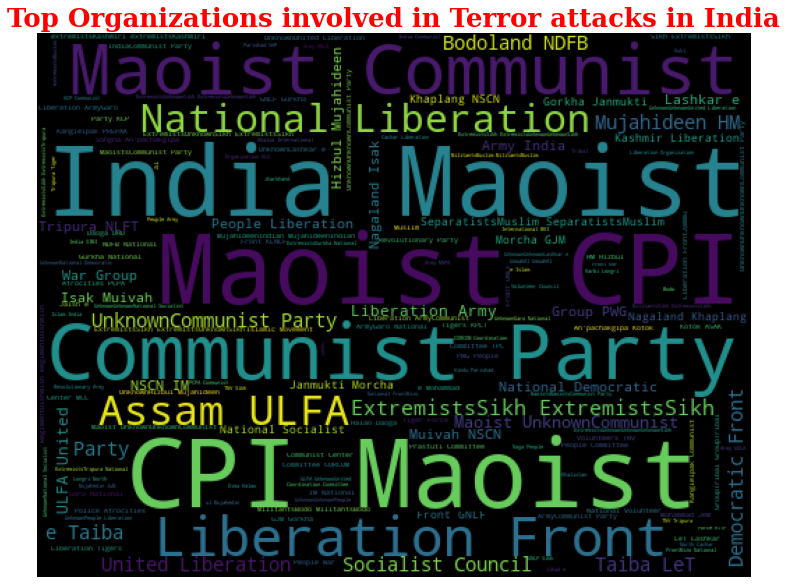

In [ ]:
cities = df_india.Gang_name.dropna(False)
plt.subplots(figsize=(20,10))
wordcloud= WordCloud(background_color='black',
                     width=512,
                     height=390).generate(''.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Top Organizations involved in Terror attacks in India',fontdict={'family':'serif','color':'red','weight':'bold','size':26})
plt.show()

 **3.2.4 Analysis of Month wise No of Deaths and the Responsible Terrorist Group in the year 2016** .

In [ ]:
fig3 = px.bar(df_ind_2016,x='Month',y='victims',color='Gang_name',
              labels= {'victims': 'No of victims'},
              title= 'No of Victims Month wise and the Responsible Terrorist Group in 2016',
              hover_data= ['victims','Region'])
fig3.show()

**OBSERVATIONS :**

1. 'Moists' attacks were almost there in everymonth of the year 2016.
2.  Aug-2016 was month with most victims (killed+wounded) of around 160 people.

# **4. Analysis of  Terrorist group wise Terror attacks .**

In [ ]:
# Terrorist groups with Most terror attacks world wide
df['Gang_name'].value_counts()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Ansar Sarallah                                          1
Sword of Islam                                          1
Support of Ocalan-The Hawks of Thrace                   1
Arab Revolutionary Front                                1
MANO-D                                                  1
Name: Gang_name, Length: 3537, dtype: int64

In [ ]:
# Excluding 'Unkown' taking the percentage of terror attacks
top_terror_groups = round((df['Gang_name'].value_counts()/df.shape[0])*100,2)[1:].head(10)
top_terror_groups

Taliban                                             4.12
Islamic State of Iraq and the Levant (ISIL)         3.09
Shining Path (SL)                                   2.51
Farabundo Marti National Liberation Front (FMLN)    1.84
Al-Shabaab                                          1.81
New People's Army (NPA)                             1.53
Irish Republican Army (IRA)                         1.47
Revolutionary Armed Forces of Colombia (FARC)       1.37
Boko Haram                                          1.33
Kurdistan Workers' Party (PKK)                      1.27
Name: Gang_name, dtype: float64

**4.1. Analysis of Terrorist Group Vs No of Attacks world wide**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



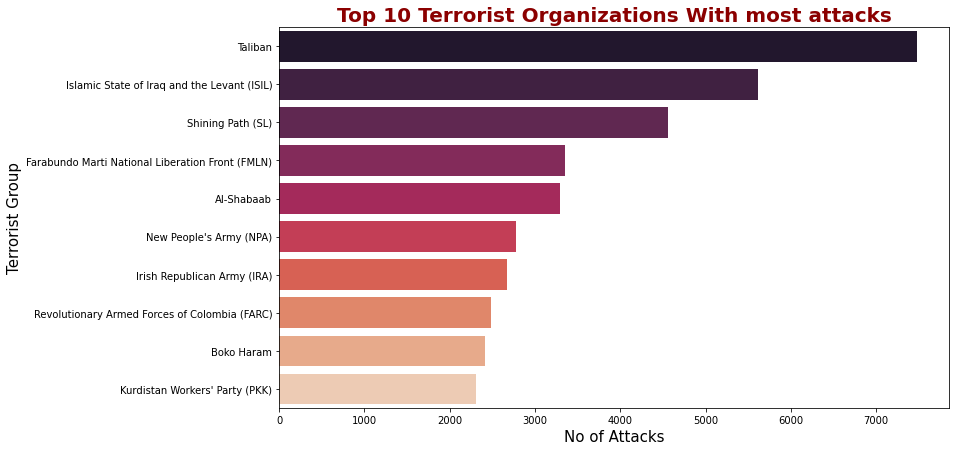

In [ ]:
# Terrorist Group Vs No of attacks they have done
plt.figure(figsize=(12,7))
sns.barplot(df['Gang_name'].value_counts()[1:11].values,df['Gang_name'].value_counts()[1:11].index, palette='rocket')
plt.title("Top 10 Terrorist Organizations With most attacks",fontsize=20,fontweight='bold',color='Darkred')
plt.ylabel('Terrorist Group',fontsize= 15)
plt.xlabel("No of Attacks",fontsize= 15)
plt.show()

**OBSERVATIONS**

'TALIBAN' is the top terrorist Organization with most attacks.

**4.2. Analysis of Top 3 Terrorist Organizations in the World**

In [ ]:
df_top3 = df[(df.Gang_name=='Taliban') | (df.Gang_name=='Islamic State of Iraq and the Levant (ISIL)') | (df.Gang_name=='Shining Path (SL)')]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



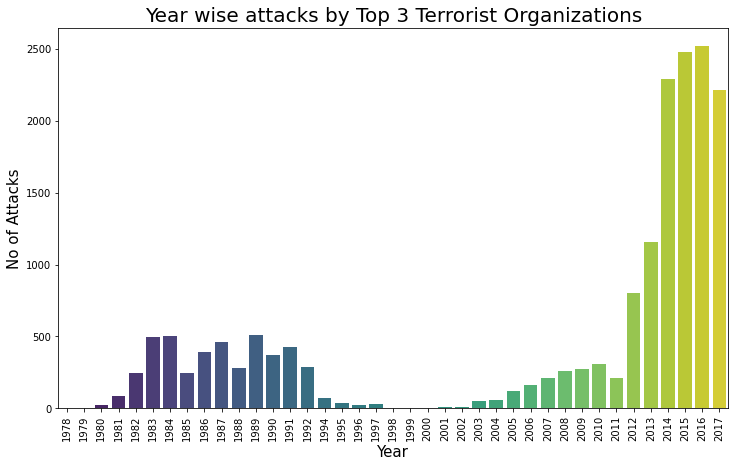

In [ ]:
# Year wise attacks by Top 3 Terrorist Organizations
plt.figure(figsize=(12,7))
sns.barplot(df_top3['Year'].value_counts().index,df_top3['Year'].value_counts().values, palette='viridis')
plt.title("Year wise attacks by Top 3 Terrorist Organizations",fontsize=20)
plt.ylabel('No of Attacks',fontsize= 15)
plt.xlabel("Year",fontsize= 15)
plt.xticks(rotation=90)
plt.show()  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



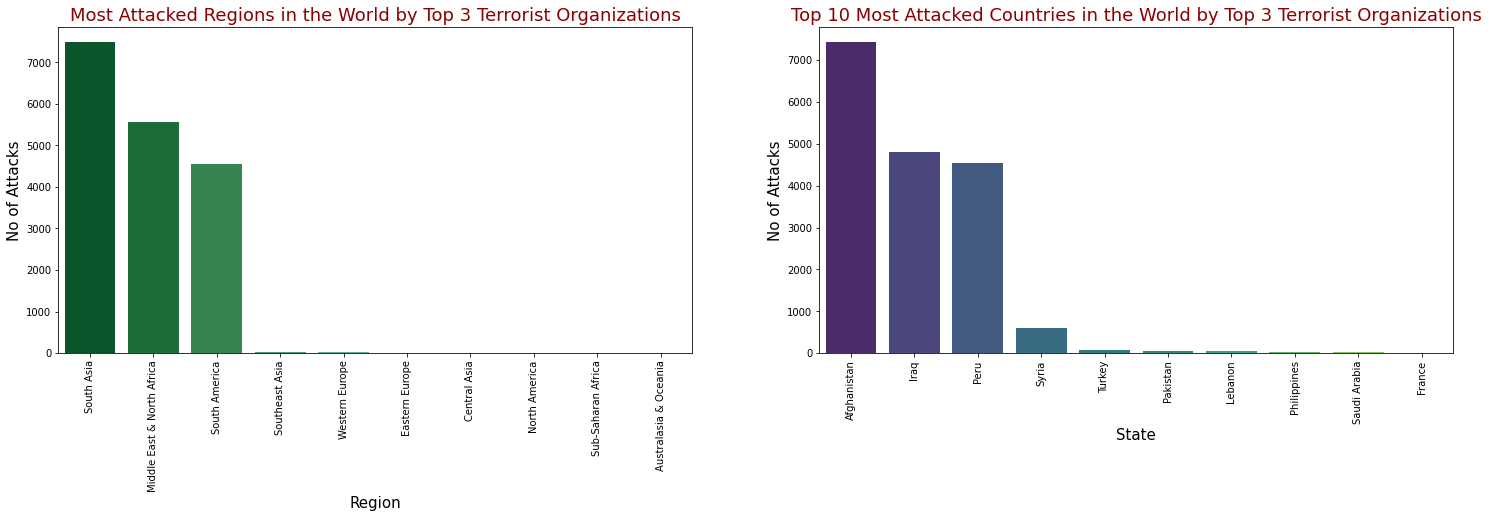

In [ ]:
# Region wise attacks by Top 3 Terrorist organizations in the World
plt.subplot(1,2,1)
sns.barplot(df_top3['Region'].value_counts().index,df_top3['Region'].value_counts().values, palette='BuGn_r')
plt.title("Most Attacked Regions in the World by Top 3 Terrorist Organizations",fontsize= 18,color='Darkred')
plt.xlabel('Region',fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('No of Attacks',fontsize = 15)

# Top 10 Countries which were attacked by Top 3 Terrorist Organizations in the World
plt.subplot(1,2,2)
sns.barplot(df_top3['Country'].value_counts().head(10).index,df_top3['Country'].value_counts().head(10).values, palette='viridis')
plt.title("Top 10 Most Attacked Countries in the World by Top 3 Terrorist Organizations",fontsize= 18,color='Darkred')
plt.xlabel('State',fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('No of Attacks',fontsize = 15)
plt.gcf().set_size_inches(25,6)

**OBSERVATIONS :**

1. These top 3 organizations attacks were increased from the year 2013 to 2015  which can be corelated to the withdrawal of US soldiers from Afghanistan.
2. 'South Asia','Middle East & North Africa' & 'South America' are the top 3 regions affected by these 3 terrorist Organizations.
3.  Afghanistan, Iraq and Peru are the top 3 countries with highest number of attacks.


# **II  BIVARIATE ANALYSIS**

**5. Analysis on Region wise No of persons Killed Vs Wounded**

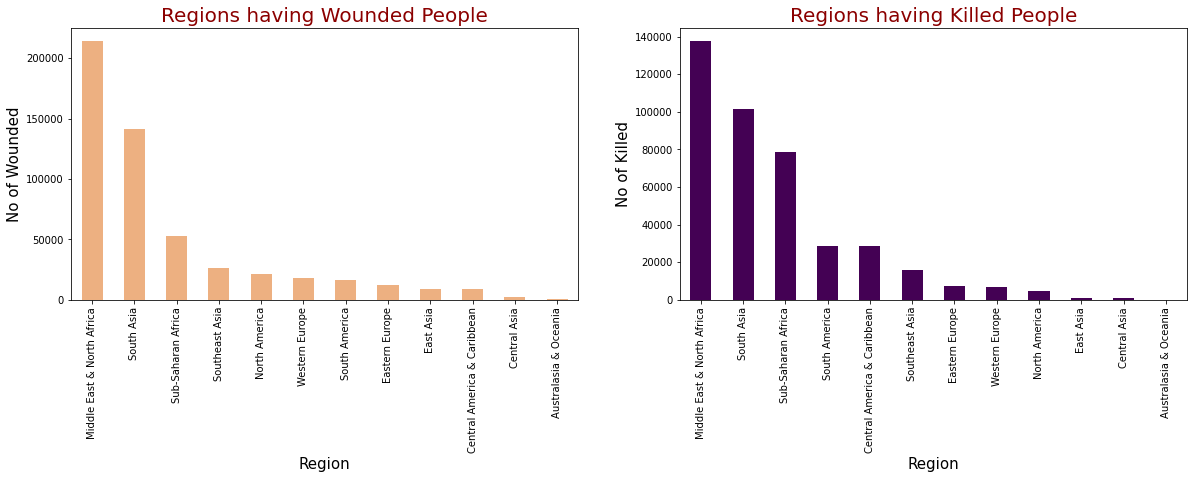

In [ ]:
plt.subplot(1,2,1)

df.groupby(['Region'])['Wounds'].sum().sort_values(ascending=False).plot(kind='bar',colormap='flare')
plt.title("Regions having Wounded People",fontsize= 20,color='darkred')
plt.xlabel('Region',fontsize=15)
plt.ylabel('No of Wounded',fontsize =15)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
df.groupby(['Region'])['Kills'].sum().sort_values(ascending=False).plot(kind='bar',colormap='viridis')
plt.title("Regions having Killed People",fontsize= 20,color='darkred')
plt.xlabel('Region',fontsize=15)
plt.ylabel('No of Killed',fontsize =15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(20,5)

OBSERVATIONS:

1. Middle East & North Africa has the most killed people(>1.4 Lacs) and wounded people (>2 Lacs).
2. Region wise rate of Kills & wounded people are similar to each other.

# 6. Analysis on Year wise No of attacks Vs Victims

In [ ]:
no_of_attacks_per_year = df.groupby('Year').size().rename("No of Attacks")

In [ ]:
df[['Year','Kills','Wounds']]

,Year,Kills,Wounds
0,1970,1.0,0.0
1,1970,0.0,0.0
2,1970,1.0,0.0
3,1970,0.0,0.0
4,1970,0.0,0.0
...,...,...,...
181686,2017,1.0,2.0
181687,2017,2.0,7.0
181688,2017,0.0,0.0
181689,2017,0.0,0.0


In [ ]:
year_by_kills_wounds= df.groupby('Year').agg({'Kills':'sum','Wounds':'sum'})

In [ ]:
terror_trend = pd.concat([year_by_kills_wounds,no_of_attacks_per_year],axis=1)

In [ ]:
#Lets create Victims column, which is the sum of no of persons killed and wounded due to terror attack
terror_trend['victims']=terror_trend['Kills']+terror_trend['Wounds']
terror_trend.head()

,Kills,Wounds,No of Attacks,victims
Year,,,,
1970,174.0,212.0,651,386.0
1971,173.0,82.0,471,255.0
1972,566.0,409.0,568,975.0
1973,370.0,495.0,473,865.0
1974,539.0,865.0,581,1404.0


In [ ]:
fig = px.line(terror_trend,x=terror_trend.index, y ='victims',title="Terrorist attacks trend",template='plotly_dark')
fig.data[0].name= "No of Victims"
fig.update_traces(showlegend=True)
fig.add_scatter(x=terror_trend.index, y=terror_trend['No of Attacks'], mode= 'lines',name = 'No of Attacks')
fig.update_layout(xaxis_title='Year',yaxis_title='Terrorism Trends')
fig.show()


**OBSERVATIONS:**

Year wise no of attacks and victims rate are proportional to each other.

In [ ]:
fig5 = px.treemap(df,values='victims',
                  path=['Region','Target_type'],
                  color_discrete_sequence=px.colors.qualitative.Dark24,
                  title='Treemap Chart: Grouping the Target type groups in different regions')
fig5.show()

OBSERVATIONS:

Private Citizens & Properties, Military and Police are the most target types in almost all the regions.


In [ ]:
fig5 = px.treemap(df,values='victims',
                  path=['Weapon_Type','Country'],
                  color_discrete_sequence=px.colors.qualitative.Dark24,
                  title='Treemap Chart: Grouping the Weapon type wise attacks with respect to country')
fig5.show()

# **7. Analysis on Co-relation between No of Attacks, People killed and Wounded**

In [ ]:
samp = terror_trend.corr()
samp

,Kills,Wounds,No of Attacks,victims
Kills,1.000000,0.907918,0.966005,0.972601
Wounds,0.907918,1.000000,0.893600,0.980486
No of Attacks,0.966005,0.893600,1.000000,0.948715
victims,0.972601,0.980486,0.948715,1.000000


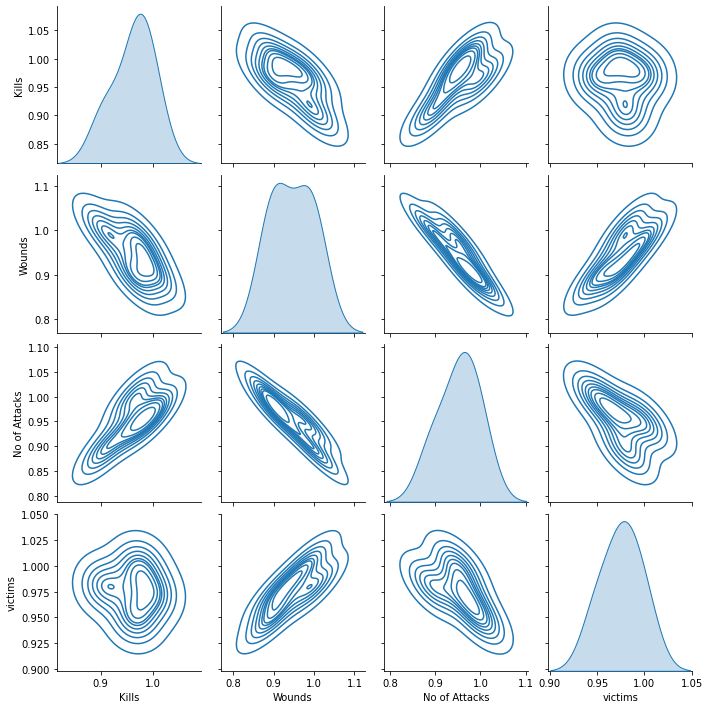

In [ ]:
sns.pairplot(samp,kind='kde')


OBSERVATIONS 

1.Kills Vs Wounds are negatively corelated.
2.Kills Vs No of Attacks were positively corelated.

# III. Multivariate Analysis

**8. Analysis of Region wise Attack type & Target Type**

In [ ]:
fig6 = px.sunburst(df,values='victims',
                   path=['Region','Attack_type','Target_type'],
                   color_discrete_sequence=px.colors.qualitative.Dark24,
                   title='Sunburst Chart: Grouping the Region wise Attack Type & Target types ')
fig6.show()

**9. Analysis on Top 3 Organizations with respect to Region and Country on Sunburst chart**

In [ ]:
fig6 = px.sunburst(df_top3,values='victims',
                   path=['Gang_name','Region','Country'],
                   color_discrete_sequence=px.colors.qualitative.Dark24,
                   title='Sunburst Chart: Grouping the Top 3 gangs attacks with respect to region & Country')
fig6.show()

OBSERVATIONS:

1.Taliban's were most active in South Asia region and Afghanistan is the country which suffered most attacks by this group.
2.ISIL were most active in Middle East & North Africa region. Iraq, Syria and Turkey are the top 3 attacked countries by them.

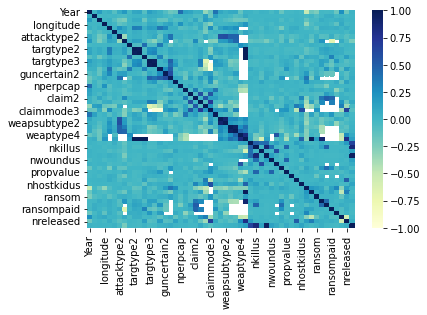

In [ ]:
#new_df = df.pivot_table(index='Year',columns='Country',values='Kills', aggfunc='sum')
new_df = df.corr()
sns.heatmap(df,cmap="YlGnBu")

**# 10. Observations & Conclusions of EDA on Global Terrorism Dataset**


1.Terrorist attacck's reached a peak during 2014 and then in 2015, started to drop. The drop in the number of terror attacks is not a sign of improvemnet in security checks in the society, as the ability to carry out a successful terror attack has not reduced significantly.

2.Iraq is the most affected nation of all and it has suffered the highest number of attacks followed by Pakistan, Afganistan and India.

3.The middle East & North Africa is the most affected region in terms of the number of terror attacks among all the regions followed by South Asia, South America and Sub-Saharan Africa.

4.Most of the attacks are either bombing or explosions followed by firearms and the most used weapons in the terror attacks are explosives and assault weapons.

5.Taliban and ISIL are the most active terrorist organisations in the world and Afghanistan is the country that has suffered the most because of Taliban's.

6.In 2016, India suffered the highest number of attacks, which was peaked during Aug-2016. Most attacks were happened in Srinagar (Jammu & Kashmir). Maoists were responsible for most of the attcaks.

7.This creates a cycle of terrorism as poverty and unemployment help radical ideologists lure youth towards terrorism, discouraging investors which in turn effects the earnings of local governments and leads to further poverty and unemployment.

**MITIGATION MEASURES :**

1.Defining terrorism on a global stage and adopting an international framework to tackle terrorism.
2. Countries should take measures against illegal immigration by implementing better tracking systems.
3.Creating a joint task force to improve intelligence sharing and sharing the best practices to combat
terrorism.
4. By imposing strict regulations on the access and sale of dangerous weapons and firearms and tracking sources of such weapons.
5. Education in population control and improving conditions to encourage employment opportunities might reduce terror activities in the long run.
6.Strict policies against disinformation and radicalization need to be adopted, including media & internet.
7.Adopting a global framework and implementing a tough action plan against terror financiers.